<a href="https://colab.research.google.com/github/MarkusNeusinger/defichain-data-toolkit/blob/main/notebooks/dfi_reserve_stakingPools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os, sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# import defichain-data-toolkit utils
if os.path.isdir('defichain-data-toolkit'): os.system('rm -rf defichain-data-toolkit')
!git clone https://github.com/MarkusNeusinger/defichain-data-toolkit.git
sys.path.insert(1, 'defichain-data-toolkit')

from utils import fetch_history

print(f"\nNotebook last run: {datetime.utcnow()}")

Cloning into 'defichain-data-toolkit'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 50 (delta 15), reused 27 (delta 8), pack-reused 0
Receiving objects: 100% (50/50), 1.35 MiB | 20.33 MiB/s, done.
Resolving deltas: 100% (15/15), done.

Notebook last run: 2023-09-21 20:31:29.742267


In [9]:
# fetching data
df = fetch_history('hourly', ['dETH-DFI DFI Reserve', 'dSOL-DFI DFI Reserve', 'dDOT-DFI DFI Reserve',
                             'dMATIC-DFI DFI Reserve', 'dSUI-DFI DFI Reserve'],
                   from_timestamp='2023-09-08')
df.sort_values('datetime_utc', ascending=True, inplace=True)
df['DFI Reserve Staking Pools'] = df.drop('datetime_utc', axis=1).sum(axis=1, skipna=True)
df.head()

100%|██████████| 5/5 [00:00<00:00, 14.74it/s]


,datetime_utc,dsol-dfidfireserve,dmatic-dfidfireserve,dsui-dfidfireserve,deth-dfidfireserve,ddot-dfidfireserve,DFI Reserve Staking Pools
0,2023-09-08 00:00:00,208691.128500,165653.332545,135435.803191,2.065377e+07,123608.222008,2.128716e+07
1,2023-09-08 01:00:00,211230.597892,166180.006180,141938.661797,2.065311e+07,123654.198621,2.129612e+07
2,2023-09-08 02:00:00,211836.562373,170947.159023,141938.661797,2.064653e+07,123654.217659,2.129491e+07
3,2023-09-08 03:00:00,214411.893641,174989.086494,141938.661797,2.064543e+07,126319.105656,2.130309e+07
4,2023-09-08 04:00:00,220214.393860,176997.925315,141927.657781,2.064557e+07,134223.615054,2.131893e+07


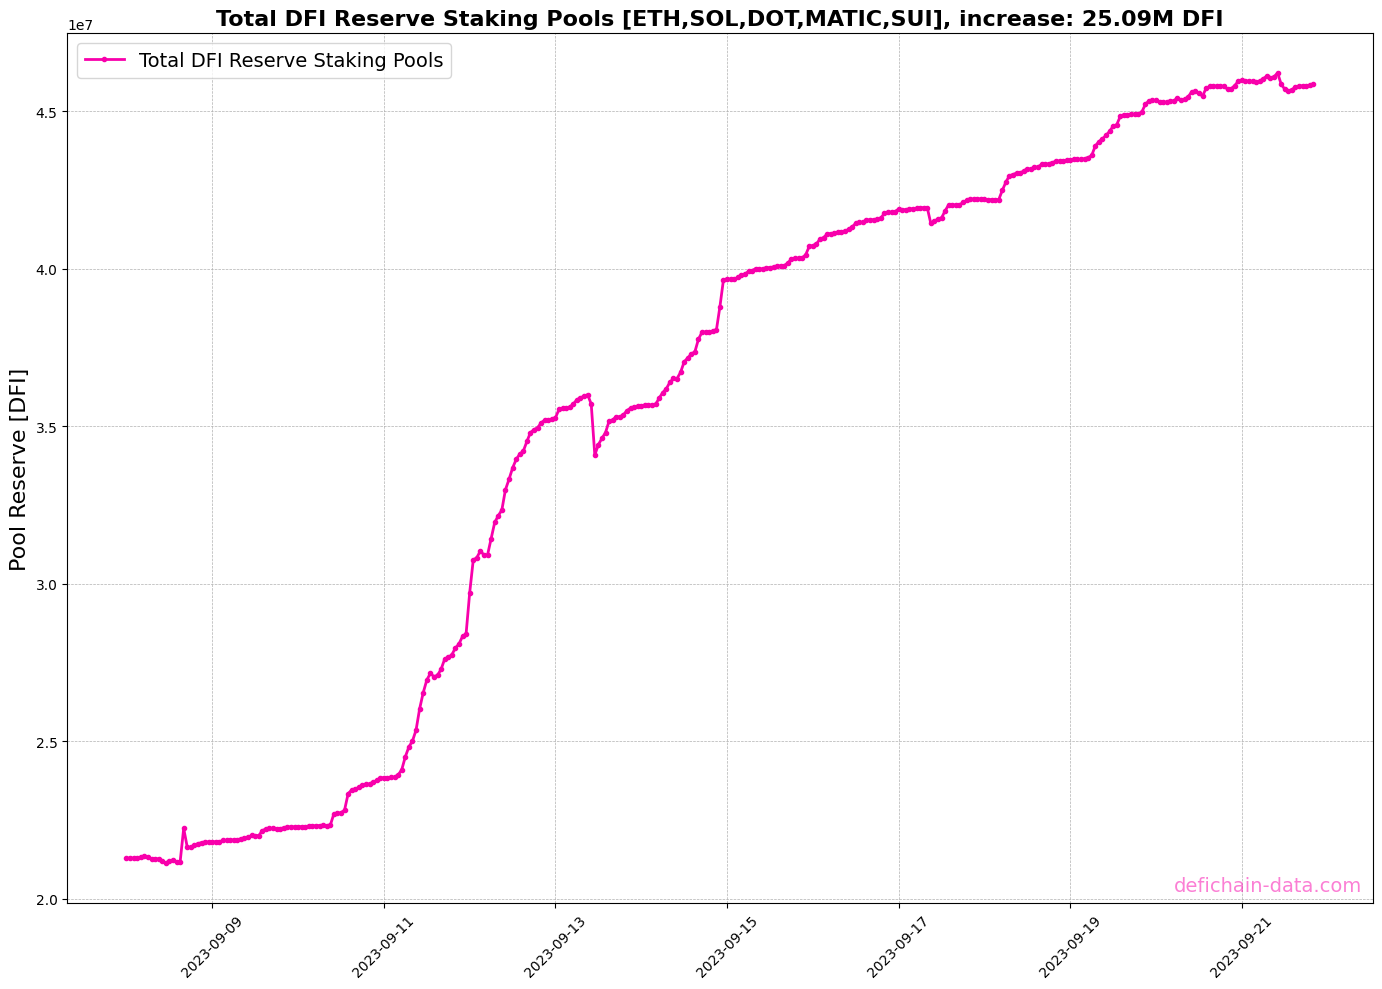

In [10]:
# Plotting DFI reserve of staking Pools
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axs.plot(df['datetime_utc'], df['DFI Reserve Staking Pools'], marker='.', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Total DFI Reserve Staking Pools')

delta = (df['DFI Reserve Staking Pools'].max()-df['DFI Reserve Staking Pools'].min())/1000000
axs.set_title(f'Total DFI Reserve Staking Pools [ETH,SOL,DOT,MATIC,SUI], increase: {round(delta,2)}M DFI', fontsize=16, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('Pool Reserve [DFI]', fontsize=16)

axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('dfi_reserve_staking_pools.png', dpi=300)
plt.show()